<a href="https://colab.research.google.com/github/pratham1412mj/Deep-learning/blob/master/LSTM_Trial_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import csv
import io
import re
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import tensorflow.keras 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2.2.0-rc2


In [34]:
import keras
keras.__version__

'2.3.1'

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from tensorflow.keras.layers import Embedding

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [81]:
df  = pd.read_csv('/content/drive/My Drive/amazon_reviews.txt',delimiter = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOC_ID             21000 non-null  int64 
 1   LABEL              21000 non-null  object
 2   RATING             21000 non-null  int64 
 3   VERIFIED_PURCHASE  21000 non-null  object
 4   PRODUCT_CATEGORY   21000 non-null  object
 5   PRODUCT_ID         21000 non-null  object
 6   PRODUCT_TITLE      21000 non-null  object
 7   REVIEW_TITLE       21000 non-null  object
 8   REVIEW_TEXT        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [82]:
df.LABEL.value_counts()

__label1__    10500
__label2__    10500
Name: LABEL, dtype: int64

In [0]:
df.loc[df['LABEL'] == '__label1__', 'LABEL'] = '__label1__'
df.loc[df['LABEL'] == '__label2__', 'LABEL'] = '__label2__'

In [84]:
df['LABEL'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Complaints', 
                                                                title='Number complaints in each product')

In [86]:
def print_plot(index):
    example = df[df.index == index][['REVIEW_TEXT', 'LABEL']].values[0]
    if len(example) > 0:
        print(example[0])
        print('LABEL:', example[1])
print_plot(10)

Unfortunately they didn't work for me. They made me sick and throw up once of the two times I tried them
LABEL: __label1__


In [87]:
print_plot(100)

I started taking Gingko Biloba about 7 months ago because, as I've grown older, I've noticed that my brain processes have slowed down and become a bit muddled.By taking this product TWICE a day for the last 7 months, that 'muddy' sensation in my brain is gone, I can remember the little things that i would normally forget, and I'm able to learn new tricks on my computer again. Thank heavens! I take one pill in the morning and another in the evening.  I am not sure if I will ever stop taking these, they help so much.  I do take the brain teasers online as well and that seems to help with my brain function as well.
LABEL: __label1__


In [0]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].apply(clean_text)
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].str.replace('\d+', '')

In [89]:
print_plot(10)

unfortunately didnt work made sick throw two times tried
LABEL: __label1__


In [90]:
print_plot(100)

started taking gingko biloba  months ago ive grown older ive noticed brain processes slowed become bit muddledby taking product twice day last  months muddy sensation brain gone remember little things would normally forget im able learn new tricks computer thank heavens take one pill morning another evening sure ever stop taking help much take brain teasers online well seems help brain function well
LABEL: __label1__


In [91]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['REVIEW_TEXT'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 40744 unique tokens.


In [92]:
X = tokenizer.texts_to_sequences(df['REVIEW_TEXT'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (21000, 250)


In [93]:
Y = pd.get_dummies(df['LABEL']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (21000, 2)


In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 123)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(18900, 250) (18900, 2)
(2100, 250) (2100, 2)


In [0]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)


In [96]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

66/66 [==============================] - 4s 65ms/step - loss: 1.2274 - accuracy: 0.6071
Test set
  Loss: 1.227
  Accuracy: 0.607


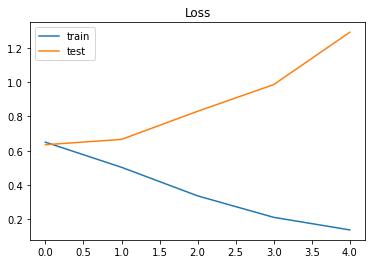

In [97]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

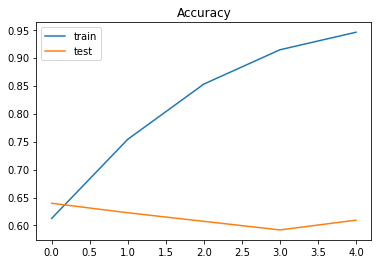

In [98]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [52]:

new_review = ['Having spent a lot of money on headphones and audio gear in my time, I cant get my head around how good these are for the money - they are not the best quality, but compared to my 300quid AKGs etc - they are a superb budget option...']
seq = tokenizer.texts_to_sequences(new_review)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['__label1__','__label2__']
print(pred, labels[np.argmax(pred)])

[[9.9939799e-01 6.0200575e-04]] __label1__
